## Supply Chain Management: (Feature Engineerig and Model Building):

* Feature engineering is the process of transforming raw data into a format that is suitable for machine learning algorithms. It involves selecting, creating, and transforming features (also known as variables or attributes) that best represent the underlying patterns in the data and enable the machine learning model to make accurate predictions or classifications.

### Installing Necessary Libraries:

In [2]:
# Data MAnipulation libraries:
import numpy as np
import pandas as pd
# Data visulization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
#Waring filer library
import warnings
warnings.filterwarnings('ignore')

### Loading Data:

In [120]:
pd.set_option('display.max_columns',None)

In [4]:
data = pd.read_excel('Supplychain train dataset.xlsx')
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


### Checking null values:

In [6]:
data.isnull().sum()/len(data)*100

Ware_house_ID                    0.000000
WH_Manager_ID                    0.000000
Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      3.959368
wh_est_year                     47.607223
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     3.634312
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0

Following columns have null values:
   * workers_num
   * wh_est_year
   * approved_wh_govt_certificate

### Imputing missing values:

In [9]:
print("Mean of the columns workers_num ",data['workers_num'].mean())
print("Mean of the columns workers_num ",data['workers_num'].median())

Mean of the columns workers_num  28.93639825130447
Mean of the columns workers_num  28.0


In [10]:
# Replacing the NULL values by median:
data['workers_num'] = data['workers_num'].fillna(28)

In [11]:
print("Mean of the columns workers_num ",data['wh_est_year'].mean())
print("Mean of the columns workers_num ",data['wh_est_year'].median())

Mean of the columns workers_num  2009.4012063765617
Mean of the columns workers_num  2009.0


In [12]:
# Replacing the NULL values by median:
data['wh_est_year'] = data['wh_est_year'].fillna(2009)

In [14]:
# Since approved_wh_govt_certificate is a categorical columns lets check the mode:

print("Mean of the columns workers_num ",data['approved_wh_govt_certificate'].mode())

Mean of the columns workers_num  0    C
Name: approved_wh_govt_certificate, dtype: object


In [15]:
# Replacing the NULL values with mode:
data['approved_wh_govt_certificate'] = data['approved_wh_govt_certificate'].fillna('C')

In [16]:
data.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

**Now Data is clean and has no null values**

### Encoding categorical features:

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [22]:
for col in ['Location_type','WH_capacity_size','zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate']:
    print("{} is a categorical feature".format(col))
    print("Each categories are as follows: ")
    print(data[col].value_counts())
    print(" ")

Location_type is a categorical feature
Each categories are as follows: 
Rural    20334
Urban     1816
Name: Location_type, dtype: int64
 
WH_capacity_size is a categorical feature
Each categories are as follows: 
Large    8968
Mid      8902
Small    4280
Name: WH_capacity_size, dtype: int64
 
zone is a categorical feature
Each categories are as follows: 
North    9069
West     7055
South    5644
East      382
Name: zone, dtype: int64
 
WH_regional_zone is a categorical feature
Each categories are as follows: 
Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: WH_regional_zone, dtype: int64
 
wh_owner_type is a categorical feature
Each categories are as follows: 
Company Owned    12035
Rented           10115
Name: wh_owner_type, dtype: int64
 
approved_wh_govt_certificate is a categorical feature
Each categories are as follows: 
C     5664
B+    4321
B     4269
A     4158
A+    3738
Name: approved_wh_govt_certificate, dtype: int64
 


**Using Label Encoders to convert the categorical columns:**

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [24]:
for col in ['Location_type','WH_capacity_size','zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate']:
    data[col] = label_encoder.fit_transform(data[col])

In [25]:
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,1,2,3,5,3,1,2,4651,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,WH_100001,EID_50001,0,0,1,4,0,0,4,6217,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,WH_100002,EID_50002,0,1,2,1,1,0,4,4306,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,WH_100003,EID_50003,0,1,1,2,7,4,2,6000,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,WH_100004,EID_50004,0,0,1,4,3,1,2,4740,...,1,112,25.0,2009.0,18,0,4,6,24,24071


**Dropping Ware_house_ID and WH_Manager_ID**

In [27]:
data = data.drop(['Ware_house_ID','WH_Manager_ID'], axis = 1)

In [28]:
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071


**Finding and replacing the outliers**

In [29]:
def find_outliers(my_df,col):
    col_data = my_df[col] 
    #Using Quartiles to comment IQR
    Q1 = col_data.quantile(0.25)
    Q2 = col_data.quantile(0.50)
    Q3 = col_data.quantile(0.75)
        
    IQR = Q3-Q1
    LW = Q1-(IQR*1.5)
    UW = Q3+(IQR*1.5)
        
    #Printing all the outliers
    
    outliers = my_df.loc[(col_data<LW) | (col_data>UW)]
    outliers_density = round(len(outliers)/len(my_df),2)
    if len(outliers)==0:
        print(f'Feature {col} doesnot have any ouliers')
        print('\n')
        
    else:
        print(f'Feature {col} has outliers')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outliers)}')
        print('\n')
        print(f'outlier percentage in {col} is {outliers_density}%')
        print('\n')
        display(my_df[(col_data<LW) | (col_data>UW)])

In [30]:
for col in data.columns:
    find_outliers(data,col)

Feature Location_type has outliers


Total number of outliers in Location_type are 1816


outlier percentage in Location_type is 0.08%




,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2009.0,13,0,0,5,15,17115
12,1,1,1,1,4,0,3,5012,1,48,...,0,95,28.0,2022.0,4,0,3,1,1,5124
24,1,0,3,4,1,0,4,5670,1,25,...,1,140,31.0,2009.0,12,0,4,2,14,15125
45,1,0,3,4,7,0,3,5667,0,63,...,1,220,38.0,2015.0,21,1,1,3,14,31113
49,1,0,2,4,3,0,3,3700,0,66,...,1,196,26.0,2000.0,31,1,1,5,10,44116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22097,1,0,1,5,0,0,3,4304,1,29,...,1,93,28.0,2009.0,34,0,2,6,6,41078
22104,1,2,1,0,2,2,2,5169,1,52,...,1,222,33.0,2009.0,23,0,1,3,3,29064
22134,1,0,1,5,1,0,3,3837,1,54,...,1,87,25.0,2009.0,12,0,1,6,28,18114
22135,1,0,2,4,8,0,4,4312,1,19,...,0,194,21.0,2014.0,19,1,0,2,25,26114


Feature WH_capacity_size doesnot have any ouliers


Feature zone doesnot have any ouliers


Feature WH_regional_zone doesnot have any ouliers


Feature num_refill_req_l3m doesnot have any ouliers


Feature transport_issue_l1y has outliers


Total number of outliers in transport_issue_l1y are 2628


outlier percentage in transport_issue_l1y is 0.12%




,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2009.0,17,1,1,3,27,22115
9,0,2,2,5,4,3,3,3869,0,35,...,0,78,43.0,2009.0,6,0,4,6,2,7130
26,0,2,3,5,5,3,4,4063,0,40,...,1,229,21.0,2009.0,8,0,4,6,9,10077
27,0,2,2,5,8,3,2,5790,1,31,...,0,98,36.0,2009.0,11,0,4,4,9,14150
57,0,0,1,5,2,4,2,5308,1,69,...,1,77,39.0,2009.0,17,0,2,3,23,19095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22080,0,2,3,5,5,3,4,4620,0,21,...,1,89,34.0,2007.0,17,0,4,5,2,22131
22096,0,1,3,3,1,3,3,5187,1,62,...,1,57,30.0,2009.0,15,0,2,3,26,18086
22113,0,0,1,5,8,3,3,5204,1,58,...,0,70,33.0,2009.0,6,1,3,4,28,7121
22118,0,2,1,0,3,5,4,4272,1,21,...,1,208,31.0,2009.0,4,1,4,1,3,5103


Feature Competitor_in_mkt has outliers


Total number of outliers in Competitor_in_mkt are 85


outlier percentage in Competitor_in_mkt is 0.0%




,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
37,0,1,0,2,0,1,8,6804,1,59,...,0,77,29.0,2009.0,17,0,2,4,27,19100
127,0,2,0,0,8,0,8,3948,1,54,...,1,161,25.0,2011.0,15,0,2,5,31,19124
296,0,2,3,5,5,0,10,5025,0,24,...,1,160,21.0,2006.0,38,0,2,5,9,47145
352,1,1,3,1,3,0,8,4727,1,19,...,1,73,30.0,1998.0,25,0,4,4,12,32137
486,0,1,0,3,1,3,8,4212,1,19,...,0,79,16.0,2009.0,27,0,4,2,26,33125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,0,1,0,3,2,3,8,3941,0,41,...,1,129,33.0,2009.0,10,1,3,2,26,13110
21065,1,0,3,5,4,3,8,3748,1,60,...,0,158,50.0,2009.0,11,1,2,3,23,13151
21202,0,1,0,3,2,0,8,5192,0,43,...,1,99,30.0,2009.0,6,0,0,1,26,8139
21382,0,2,3,5,6,1,8,7439,0,16,...,0,204,18.0,2012.0,20,0,4,2,8,26055


Feature retail_shop_num has outliers


Total number of outliers in retail_shop_num are 825


outlier percentage in retail_shop_num is 0.04%




,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
28,0,2,1,5,3,1,1,7692,0,62,...,0,154,20.0,2009.0,0,0,4,0,8,3123
59,1,0,1,4,8,0,2,7311,0,62,...,1,219,34.0,2010.0,21,0,0,6,17,28127
76,0,0,1,5,0,1,1,8913,1,55,...,1,95,38.0,2009.0,14,0,4,6,29,18118
170,0,2,2,5,4,3,3,8736,1,63,...,1,187,28.0,2017.0,6,1,2,5,15,7120
173,0,0,1,5,7,1,3,8137,1,33,...,1,101,23.0,2015.0,13,0,3,1,28,16116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21981,0,2,0,5,6,2,7,8781,0,38,...,0,139,40.0,2012.0,8,0,3,2,15,10100
22087,0,1,3,3,2,1,3,7422,0,27,...,1,188,33.0,2009.0,16,0,2,6,11,18075
22088,0,2,3,5,6,0,2,7452,1,31,...,1,159,29.0,2002.0,31,1,1,5,15,43084
22117,0,2,1,0,3,0,4,10846,0,38,...,1,60,33.0,2002.0,37,1,1,4,16,51124


Feature wh_owner_type doesnot have any ouliers


Feature distributor_num doesnot have any ouliers


Feature flood_impacted has outliers


Total number of outliers in flood_impacted are 2186


outlier percentage in flood_impacted is 0.1%




,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
16,0,1,3,3,0,0,2,5569,0,16,...,1,231,28.0,2009.0,9,0,3,5,11,12127
28,0,2,1,5,3,1,1,7692,0,62,...,0,154,20.0,2009.0,0,0,4,0,8,3123
58,0,2,2,0,1,1,2,4004,0,38,...,1,168,27.0,2009.0,25,1,4,4,21,32057
62,0,0,2,5,7,0,4,4445,1,47,...,1,239,29.0,2012.0,10,1,1,5,23,13061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22128,0,0,1,4,3,0,3,4677,0,25,...,1,258,48.0,2002.0,33,0,0,5,24,45109
22129,0,0,2,4,0,0,2,4113,1,48,...,0,143,28.0,2009.0,8,0,4,3,10,11117
22134,1,0,1,5,1,0,3,3837,1,54,...,1,87,25.0,2009.0,12,0,1,6,28,18114
22141,0,1,1,1,0,2,3,4844,1,22,...,1,211,34.0,2009.0,4,0,2,2,18,5069


Feature flood_proof has outliers


Total number of outliers in flood_proof are 1207


outlier percentage in flood_proof is 0.05%




,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2009.0,13,0,0,5,15,17115
41,0,2,2,0,1,0,1,4487,0,46,...,1,216,28.0,2009.0,25,0,4,5,21,31087
62,0,0,2,5,7,0,4,4445,1,47,...,1,239,29.0,2012.0,10,1,1,5,23,13061
67,0,0,1,4,1,0,3,6720,1,30,...,1,90,25.0,2009.0,22,0,3,4,17,27069
69,0,1,2,1,6,1,3,3880,0,23,...,1,112,35.0,2009.0,9,1,3,3,32,11134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22064,0,0,1,4,1,0,3,4638,1,20,...,1,73,31.0,2009.0,11,0,0,3,14,15085
22071,0,1,2,1,4,0,3,4526,1,40,...,1,230,36.0,2008.0,15,0,3,2,12,18132
22075,1,1,2,1,3,0,3,3138,1,23,...,1,149,27.0,2017.0,6,0,0,4,32,8098
22097,1,0,1,5,0,0,3,4304,1,29,...,1,93,28.0,2009.0,34,0,2,6,6,41078


Feature electric_supply doesnot have any ouliers


Feature dist_from_hub doesnot have any ouliers


Feature workers_num has outliers


Total number of outliers in workers_num are 533


outlier percentage in workers_num is 0.02%




,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
167,0,1,1,1,3,0,4,3972,0,30,...,1,152,47.0,2017.0,10,1,1,1,12,15090
234,0,0,3,4,8,2,4,4585,1,54,...,1,136,48.0,2005.0,17,1,0,6,25,22093
251,0,1,1,2,2,0,3,7822,0,35,...,0,76,50.0,2009.0,37,1,1,5,27,49091
266,0,0,1,5,4,0,4,4943,1,30,...,1,183,62.0,2021.0,0,0,4,0,23,6123
282,0,0,3,5,2,1,2,5045,0,59,...,0,148,49.0,2009.0,15,0,2,5,23,18070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21992,0,1,1,3,4,0,6,3063,1,31,...,1,176,60.0,2007.0,39,0,3,4,26,48122
21993,1,0,1,4,2,1,2,4103,1,43,...,1,221,48.0,2009.0,26,0,1,3,10,33082
22110,0,1,2,1,0,0,3,4727,0,42,...,1,72,51.0,2009.0,15,0,3,2,12,17133
22111,0,0,3,5,3,1,4,4608,0,52,...,1,244,72.0,2009.0,9,0,0,6,23,11123


Feature wh_est_year has outliers


Total number of outliers in wh_est_year are 9877


outlier percentage in wh_est_year is 0.45%




,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
8,0,2,2,5,8,1,4,5381,1,42,...,1,124,22.0,2013.0,13,1,1,5,2,18082
10,0,0,1,5,7,1,3,4623,0,31,...,1,150,37.0,1999.0,17,0,3,4,6,21125
11,0,0,1,5,7,0,5,4627,1,40,...,0,225,16.0,2017.0,11,0,2,2,28,14115
12,1,1,1,1,4,0,3,5012,1,48,...,0,95,28.0,2022.0,4,0,3,1,1,5124
18,0,1,1,2,4,1,4,4598,1,58,...,1,159,22.0,2001.0,29,1,1,5,27,38082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22135,1,0,2,4,8,0,4,4312,1,19,...,0,194,21.0,2014.0,19,1,0,2,25,26114
22136,1,2,2,0,3,1,2,5792,1,43,...,0,217,21.0,2012.0,19,0,2,2,31,22082
22139,0,1,3,2,5,0,4,3771,1,66,...,0,97,30.0,1998.0,24,0,4,2,19,30102
22142,0,0,1,5,5,0,2,6080,0,63,...,0,182,29.0,1998.0,34,0,4,2,28,46138


Feature storage_issue_reported_l3m doesnot have any ouliers


Feature temp_reg_mach doesnot have any ouliers


Feature approved_wh_govt_certificate doesnot have any ouliers


Feature wh_breakdown_l3m doesnot have any ouliers


Feature govt_check_l3m doesnot have any ouliers


Feature product_wg_ton doesnot have any ouliers




* retail_shop_num
* Competitor_in_mkt
* workers_num

These column has ouliers and can be replaced by median.

### Feature Selection :

**Variance Inflation Factor (VIF):**

It is a measure of multicollinearity, which is the presence of high correlation among predictor variables in a regression model. VIF assesses how much the variance of the estimated regression coefficient is inflated due to multicollinearity.

The formula for calculating VIF for a particular feature is as follows:

VIF(feature) = 1 / (1 - R^2)

Where R^2 is the coefficient of determination obtained by regressing the feature against all other predictor variables.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [58]:
def VIF(features):
    X = data[features]    
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif['vif'] =[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['features']=X.columns
    vif = vif[vif['features']!='intercept']
    return vif

In [59]:
features = data.drop('product_wg_ton', axis=1).columns

In [60]:
VIF(features=features).sort_values('vif', ascending = False)

,vif,features
16,1.888475,storage_issue_reported_l3m
15,1.692548,wh_est_year
1,1.399532,WH_capacity_size
3,1.391951,WH_regional_zone
12,1.191137,electric_supply
19,1.190154,wh_breakdown_l3m
14,1.154377,workers_num
20,1.129074,govt_check_l3m
17,1.102610,temp_reg_mach
4,1.078102,num_refill_req_l3m



* Since VIF is used to check the multicolinearity, the smaller value indicates that there is very less multicolinearity.
* If VIF is greater than 5 we consider this feature is to have high multicolinearity.
* VIF for all the features in our dataset is less than 5 hence there is very chance of multicolinearity.

**Mutual Information Gain:**

In [61]:
X = data.drop('product_wg_ton', axis = 1)
y= data['product_wg_ton']

In [62]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X,y)
mutual_info

array([5.46805183e-03, 2.48039106e-03, 8.83448467e-03, 3.64130885e-03,
       2.29279132e-03, 2.80594770e-02, 0.00000000e+00, 1.31301235e-03,
       1.86428857e-04, 0.00000000e+00, 5.05417630e-03, 2.06079799e-04,
       1.79784504e-03, 0.00000000e+00, 0.00000000e+00, 4.07643367e-01,
       2.11578085e+00, 1.41091771e-02, 8.20660863e-02, 1.66253344e-01,
       0.00000000e+00])

<AxesSubplot:>

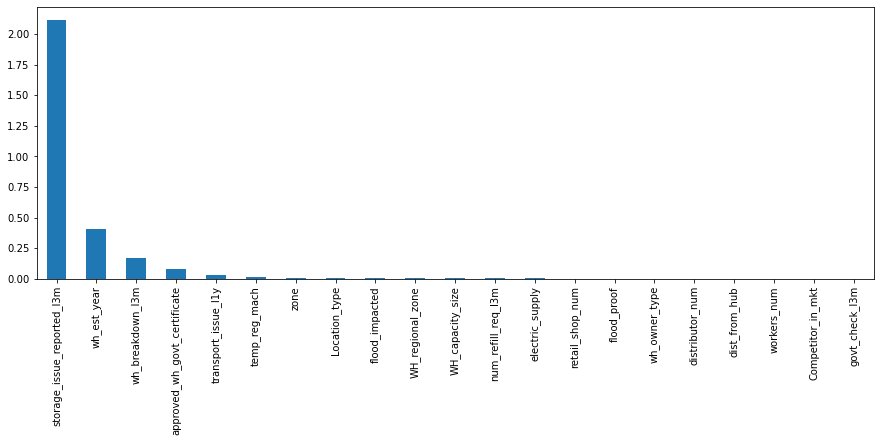

In [64]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

**Selecting the top 70th percentile features that has the highest score**

In [67]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=70)
selected_top_columns.fit(X, y)
selected_top_columns.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True, False])

In [68]:
X.columns[selected_top_columns.get_support()]

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'retail_shop_num',
       'wh_owner_type', 'electric_supply', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m'],
      dtype='object')

**OLS Regression Method**

OLS (Ordinary Least Squares) is a widely used regression technique that estimates the coefficients of a linear regression model by minimizing the sum of squared differences between the observed and predicted values of the target variable. OLS assumes a linear relationship between the predictors and the target variable, and it aims to find the best-fit line that minimizes the residual errors.

OLS can be used for feature selection through the examination of the estimated coefficients or p-values associated with each predictor variable.

In [77]:
import statsmodels.api as sm
X_ols = X.copy()
X_ols['intercept'] = 1
ols_model = sm.OLS(y,X_ols)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.549e+04
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:32:33   Log-Likelihood:            -1.9682e+05
No. Observations:               22150   AIC:                         3.937e+05
Df Residuals:                   22128   BIC:                         3.939e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Location_type                 -103.3030     43.036     -2.400      0.016    -187.656     -18.950
WH_capacity_size                22.2640     18.702      1.190      0.234     -14.393      58.921
zone                           -11.9286     13.762     -0.867      0.386     -38.903      15.046
WH_regional_zone                 0.3342      8.309      0.040      0.968     -15.952      16.620
num_refill_req_l3m              -3.8250      4.685     -0.816      0.414     -13.008       5.358
transport_issue_l1y           -284.1905     10.025    -28.348      0.000    -303.840    -264.541
Competitor_in_mkt               -5.2999     10.528     -0.503      0.615     -25.936      15.336
retail_shop_num                 -0.0011      0.011     -0.095      0.924      -0.023       0.021
wh_owner_type                   13.5050     24.472      0.552      0.581     -34.462      61.472
distributor_num                  1.4428      0.733      1.969      0.049       0.007       2.879
flood_impacted                  50.9605     40.493      1.259      0.208     -28.408     130.329
flood_proof                     55.3722     52.379      1.057      0.290     -47.295     158.039
electric_supply                -10.7484     27.018     -0.398      0.691     -63.705      42.208
dist_from_hub                    0.1403      0.188      0.747      0.455      -0.228       0.508
workers_num                      0.1654      1.643      0.101      0.920      -3.055       3.386
wh_est_year                     36.9519      2.806     13.168      0.000      31.452      42.452
storage_issue_reported_l3m    1268.9864      1.761    720.411      0.000    1265.534    1272.439
temp_reg_mach                  900.7610     26.839     33.561      0.000     848.154     953.368
approved_wh_govt_certificate  -100.5153      8.364    -12.017      0.000    -116.910     -84.121
wh_breakdown_l3m              -226.5250      7.584    -29.870      0.000    -241.389    -211.661
govt_check_l3m                  -2.6125      1.445     -1.807      0.071      -5.446       0.221
intercept                    -7.292e+04   5660.324    -12.883      0.000    -8.4e+04   -6.18e+04
==============================================================================
Omnibus:                     6503.210   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32383.582
Skew:                           1.337   Prob(JB):                         0.00
Kurtosis:                       8.285   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
stro

**Plotting Heatmap:**

<AxesSubplot:>

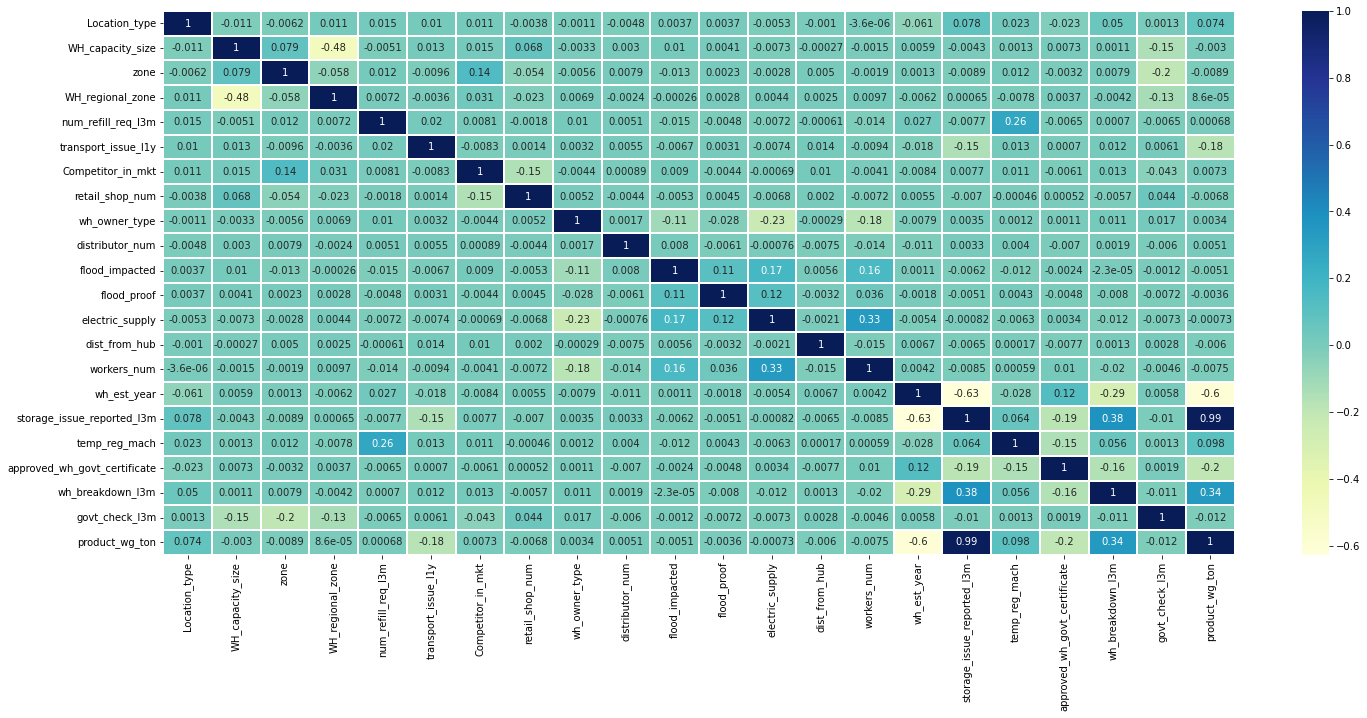

In [145]:
plt.figure(figsize=(24,10))

corr_mat = data.corr()
mask = np.triu(np.ones_like(corr_mat, dtype= bool))
sns.heatmap(corr_mat,
            cmap="YlGnBu",
           annot = True,
           linewidths=.2)

In [190]:
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,2009.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,2009.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37.0,2009.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21.0,2009.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,2009.0,18,0,4,6,24,24071


### Model Building

In [81]:
#Model selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,learning_curve

#ML models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#Model Evaluation libraries
from sklearn.metrics import r2_score,mean_squared_error

In [78]:
def train_and_test_split(data,tcol,testSize=0.3, randomState = 3):
    X = data.drop(tcol, axis = 1)
    y = data[tcol]
    return train_test_split(X,y,test_size=testSize,random_state=randomState )

In [79]:
def model_builder(model_name, model, data,t_col):
    x_train,x_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    result = [model_name,r2,rmse]
    return result

In [80]:
 def multiple_models(data, t_col):
        col_names = ['Model_Name','r2_Score','rmse']
        result = pd.DataFrame(columns = col_names)
        result.loc[len(result)]= model_builder('Linear regression',LinearRegression(),data,t_col)
        result.loc[len(result)]= model_builder('Lasso',Lasso(),data,t_col)
        result.loc[len(result)]= model_builder('Ridge',Ridge(),data,t_col)
        result.loc[len(result)]= model_builder('Decision tree',DecisionTreeRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('KNN',KNeighborsRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('Random forrest',RandomForestRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('SVM',SVR(),data,t_col)
        result.loc[len(result)]= model_builder('Gboost',GradientBoostingRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('Xgboost',XGBRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('Adaboost',AdaBoostRegressor(),data,t_col)
        return result.sort_values(by='r2_Score',ascending = False)

In [83]:
multiple_models(data,'product_wg_ton')

,Model_Name,r2_Score,rmse
7,Gboost,0.993866,914.285050
8,Xgboost,0.993837,916.466689
5,Random forrest,0.993513,940.234050
3,Decision tree,0.988092,1273.889275
9,Adaboost,0.977659,1744.826534
1,Lasso,0.976716,1781.276987
2,Ridge,0.976712,1781.424662
0,Linear regression,0.976712,1781.425542
4,KNN,0.573773,7621.245816
6,SVM,-0.000162,11674.564740


In [84]:
def k_fold_cv(X, y , fold=10):
    score_LR = cross_val_score(LinearRegression(),X,y,cv=fold)
    score_LS = cross_val_score(Lasso(),X,y,cv=fold)
    score_RD = cross_val_score(Ridge(),X,y,cv=fold)
    score_DTR = cross_val_score(DecisionTreeRegressor(),X,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(),X,y,cv=fold)
    score_RF = cross_val_score(RandomForestRegressor(),X,y,cv=fold)
    score_SVM = cross_val_score(SVR(),X,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingRegressor(),X,y,cv=fold)
    score_XGB = cross_val_score(XGBRegressor(),X,y,cv=fold)
    score_ADA = cross_val_score(AdaBoostRegressor(),X,y,cv=fold)
    
    model_name = ['Linear Regression','Lasso','Ridge','Decision tree','KNN','Random Forrest','SVM','Gradient Boost','XG Boost','ADA Boost']
    scores = [score_LR,score_LS,score_RD,score_DTR,score_KNN,score_RF,score_SVM,score_GB,score_XGB,score_ADA]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
        
    k_fold_df = pd.DataFrame(result,columns = ['Model Name','CV Accuracy','CV STD'])
    return k_fold_df.sort_values(by = 'CV Accuracy', ascending = False)

In [85]:
k_fold_cv(X,y)

,Model Name,CV Accuracy,CV STD
7,Gradient Boost,0.994188,0.000393
8,XG Boost,0.994155,0.000340
5,Random Forrest,0.993999,0.000350
3,Decision tree,0.988991,0.000553
1,Lasso,0.977299,0.001283
2,Ridge,0.977299,0.001283
0,Linear Regression,0.977299,0.001283
9,ADA Boost,0.977254,0.000938
4,KNN,0.607816,0.012289
6,SVM,-0.000382,0.000427


**GradientBoostingRegressor**

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#cerating instance of GradientBoostingRegressor()
model= GradientBoostingRegressor()
#Fitting to the train data
model.fit(X_train,y_train)
#Predicting on test data:
y_preds = model.predict(X_test)

#Calculating the r2_score and RMSE:
r2 = r2_score(y_test,y_preds)
rmse = np.sqrt(mean_squared_error(y_test,y_preds))
print("r2_score:{}".format(r2))
print("RMSE : {}".format(rmse))

r2_score:0.9939873238823242
RMSE : 900.151726746373


In [91]:
y_preds_train = model.predict(X_train)
r2 = r2_score(y_train,y_preds_train)
rmse = np.sqrt(mean_squared_error(y_train,y_preds_train))
print("training r2_score:{}".format(r2))
print("training RMSE : {}".format(rmse))

training r2_score:0.9943382456045652
training RMSE : 875.3260180366265


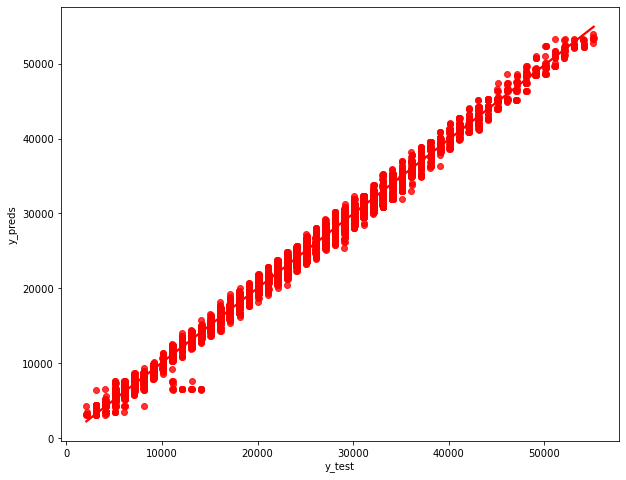

In [186]:
plt.figure(figsize=(10,8))
sns.regplot(y_test,y_preds,color='red')
plt.xlabel('y_test')
plt.ylabel('y_preds')
plt.show()

In [92]:
# Retrieve the feature importance scores
importance_scores = model.feature_importances_

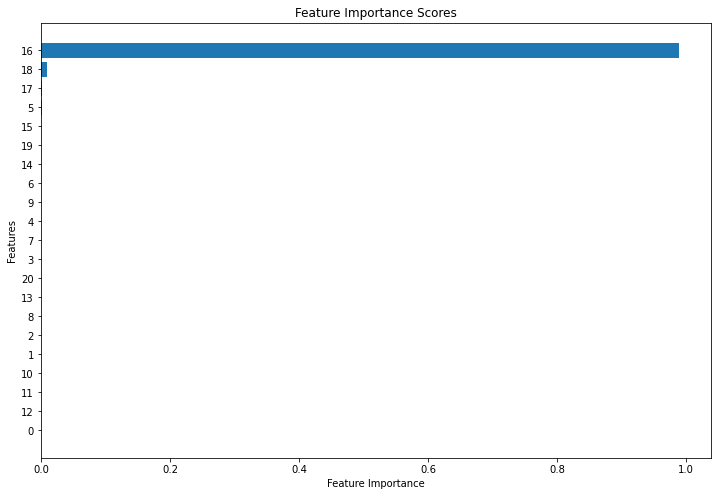

In [117]:
# Assuming 'importance_scores' contains the feature importance scores
features = np.arange(len(importance_scores))
sorted_indices = np.argsort(importance_scores)

# Create a horizontal bar plot
plt.figure(figsize=(12,8))
plt.barh(features,importance_scores[sorted_indices])
plt.yticks(features, sorted_indices)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

### PCA(Prinicpal Component Analysis)

In [164]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [165]:
def custom_PCA(X):
    n_comp = len(X.columns)
    
    #applying standard scaler for feature scaling
    sc = StandardScaler()
    X= sc.fit_transform(X)
    
    for i in range(1,n_comp):
        pca = PCA(n_components =i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            pcs = i
            break
            
    print('Explained Variance Ratio after PCA is :', evr)
    #Creating a dataframe of Principle components
    col = []
    for j in range(1,pcs+1):
        col.append('PC'+str(j))
    pca_df = pd.DataFrame(p_comp, columns = col)
    return pca_df

In [169]:
pca_df = custom_PCA(data.drop('product_wg_ton', axis = 1))

Explained Variance Ratio after PCA is : [0.09493332 0.17313677 0.24525164 0.30893441 0.36998106 0.42045279
 0.46961278 0.51759158 0.56553038 0.61306804 0.65960711 0.70378563
 0.74516736 0.78624571 0.82580016 0.8636065  0.89900036 0.93236514]


In [170]:
pca_df = pca_df.join(data['product_wg_ton'], how='left')
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,product_wg_ton
0,0.795604,0.823487,0.674227,0.495232,-0.312484,-1.131326,2.205023,2.325280,2.257644,3.248103,0.361312,1.881246,-1.656574,-1.074469,1.215707,-0.556423,0.880343,-0.647341,17115
1,-0.691632,0.833289,-1.114361,-0.630966,-0.837755,-0.218458,0.055433,-0.619639,-0.090092,-1.273222,0.120996,2.003832,-0.686904,0.598958,-0.290814,1.337372,-0.064844,-0.077936,5074
2,1.013096,0.055194,1.098227,-0.055491,-1.038795,1.211135,-0.425337,0.237499,-1.161065,-1.105444,-0.029694,1.695559,-0.333741,-0.033755,-0.299047,-0.067562,1.069512,0.209860,23137
3,0.152085,-2.231366,0.431576,-1.379623,2.646244,-0.031149,1.467381,0.524540,-1.308301,0.486171,-1.371172,-0.074006,0.383265,0.275332,0.018589,0.053830,-0.790921,0.037609,22115
4,0.159409,1.707150,-1.294098,-1.408013,-0.611278,0.222154,0.204792,0.734301,-0.345585,0.342772,-0.398422,-0.849193,2.264317,0.154400,-1.572380,-0.986020,1.199890,0.419997,24071


**Scree Plot:**

In [171]:
evr = [0.09493332, 0.17313677, 0.24525164, 0.30893441, 0.36998106, 0.42045279,
 0.46961278, 0.51759158, 0.56553038, 0.61306804, 0.65960711, 0.70378563,
 0.74516736, 0.78624571, 0.82580016, 0.8636065,  0.89900036, 0.93236514]

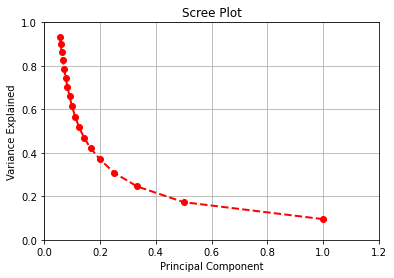

In [173]:
PC_values = np.arange(18) + 1
plt.plot(1/PC_values,evr, 'o--', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0,1)
plt.xlim(0,1.2)
plt.grid()
plt.show()

<AxesSubplot:>

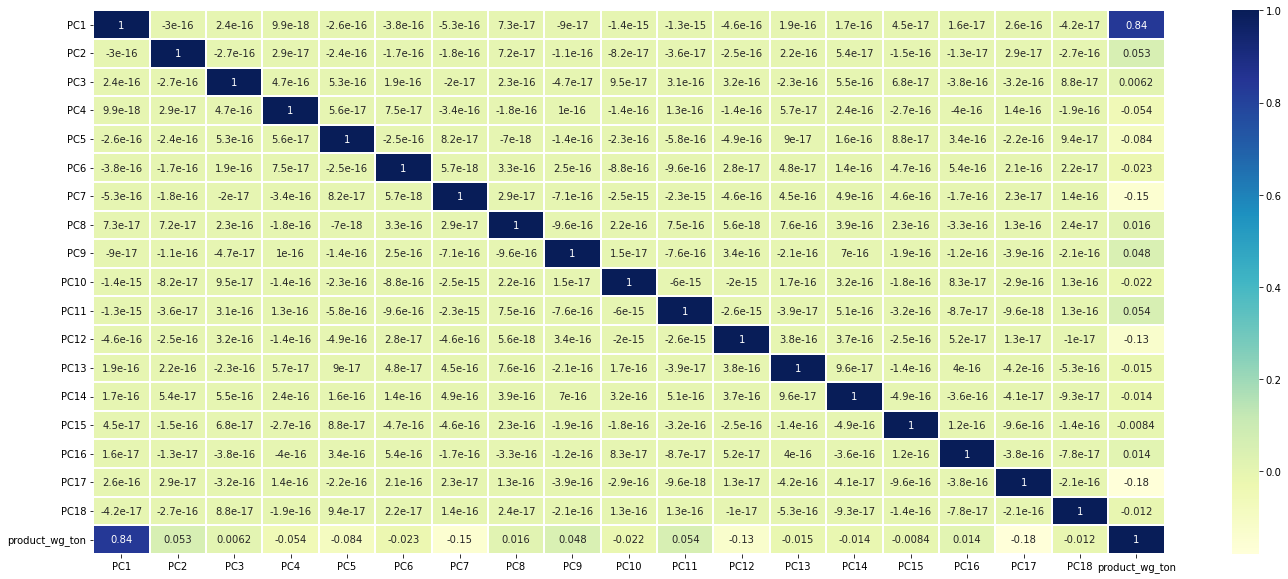

In [174]:
plt.figure(figsize=(24,10))

corr_pca = pca_df.corr()
mask = np.triu(np.ones_like(corr_pca, dtype= bool))
sns.heatmap(corr_pca,
            cmap="YlGnBu",
           annot = True,
           linewidths=.2)

**Mutual Information Gain**

In [176]:
from sklearn.feature_selection import mutual_info_regression
mutual_info_pca = mutual_info_regression(pca_df.drop('product_wg_ton', axis = 1),pca_df['product_wg_ton'])
mutual_info_pca

array([0.68124504, 0.        , 0.00430817, 0.        , 0.02134294,
       0.        , 0.02004495, 0.00116675, 0.00729982, 0.01218984,
       0.01986543, 0.06723823, 0.00539091, 0.        , 0.00345087,
       0.        , 0.10160525, 0.00865087])

<AxesSubplot:>

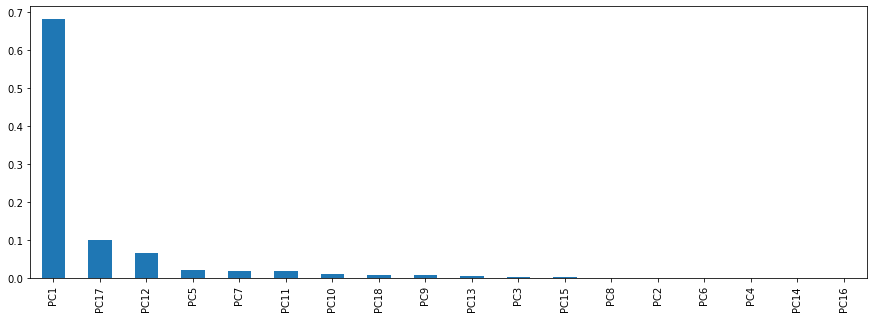

In [177]:
mutual_info_pca = pd.Series(mutual_info_pca)
mutual_info_pca.index = pca_df.drop('product_wg_ton', axis = 1).columns
mutual_info_pca.sort_values(ascending=False).plot.bar(figsize=(15,5))

**Building Gradient Boosting Model:**

In [178]:
X_pca = pca_df.drop('product_wg_ton', axis = 1)
y_pca = pca_df['product_wg_ton']

In [181]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y_pca,test_size=0.3,random_state=42)

#cerating instance of GradientBoostingRegressor()
model_pca= GradientBoostingRegressor()
#Fitting to the train data
model_pca.fit(X_train_pca,y_train_pca)
#Predicting on test data:
y_preds_pca = model_pca.predict(X_test_pca)

#Calculating the r2_score and RMSE:
r2_pca = r2_score(y_test_pca,y_preds_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca,y_preds_pca))
print("r2_score:{}".format(r2))
print("RMSE : {}".format(rmse))

r2_score:0.9943382456045652
RMSE : 875.3260180366265


In [183]:
# Retrieve the feature importance scores
importance_scores_pca = model_pca.feature_importances_

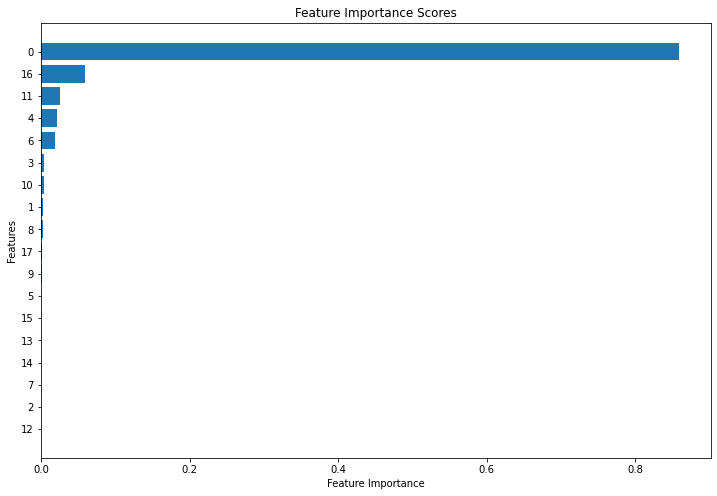

In [185]:
# Assuming 'importance_scores' contains the feature importance scores
features_pca = np.arange(len(importance_scores_pca))
sorted_indices_pca = np.argsort(importance_scores_pca)

# Create a horizontal bar plot
plt.figure(figsize=(12,8))
plt.barh(features_pca,importance_scores_pca[sorted_indices_pca])
plt.yticks(features_pca, sorted_indices_pca)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

**Based on the above results we will consider below 3 algorithms:**

   * XG Boost
   * RandomForrest
   * Gradient Boost

### Building top 3 models:

**XG Boost**

In [193]:
XGB_model = XGBRegressor()
XGB_model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

**Random Forrest**

In [194]:
RF_model = RandomForestRegressor()
RF_model.fit(X,y)

RandomForestRegressor()

**Gradient Boost**

In [195]:
GB_model = GradientBoostingRegressor()
GB_model.fit(X,y)

GradientBoostingRegressor()

### Testing and predicting on custom Test Data:

In [196]:
test_data = pd.read_excel("Supply chain test dataset.xlsx")

In [197]:
test_data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,WH_122250,EID_72250,Rural,Large,North,Zone 6,7,0,2,5397,Company Owned,26,0,0,1,75,30.0,2019.0,9,1,A,1,29
1,WH_122251,EID_72251,Rural,Large,North,Zone 6,8,2,2,5183,Rented,61,0,0,0,138,20.0,2006.0,25,0,A,4,23
2,WH_122252,EID_72252,Rural,Large,North,Zone 6,3,0,4,4665,Rented,26,0,0,1,188,34.0,NaN,24,0,B,4,23
3,WH_122253,EID_72253,Rural,Mid,North,Zone 2,2,0,3,5196,Rented,36,0,0,1,156,31.0,NaN,15,0,A,4,1
4,WH_122254,EID_72254,Rural,Mid,North,Zone 2,5,2,4,8275,Rented,58,0,0,1,237,NaN,NaN,21,1,B+,2,12


In [198]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 2750 non-null   object 
 1   WH_Manager_ID                 2750 non-null   object 
 2   Location_type                 2750 non-null   object 
 3   WH_capacity_size              2750 non-null   object 
 4   zone                          2750 non-null   object 
 5   WH_regional_zone              2750 non-null   object 
 6   num_refill_req_l3m            2750 non-null   int64  
 7   transport_issue_l1y           2750 non-null   int64  
 8   Competitor_in_mkt             2750 non-null   int64  
 9   retail_shop_num               2750 non-null   int64  
 10  wh_owner_type                 2750 non-null   object 
 11  distributor_num               2750 non-null   int64  
 12  flood_impacted                2750 non-null   int64  
 13  flo

In [199]:
test_data.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      110
wh_est_year                     1288
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     101
wh_breakdown_l3m                   0
govt_check_l3m                     0
dtype: int64

**Observations:**

* Test data has null values in few columns which needs to be trested before predicting the target column.
* There are categorical columns that needs to converted into numerical columns.

### Imputing missing values:

In [200]:
print("Mean of the columns workers_num ",test_data['workers_num'].mean())
print("Mean of the columns workers_num ",test_data['workers_num'].median())

Mean of the columns workers_num  29.00719696969697
Mean of the columns workers_num  28.0


In [201]:
# Replacing the NULL values by median:
test_data['workers_num'] = test_data['workers_num'].fillna(28)

In [204]:
# Since approved_wh_govt_certificate is a categorical columns lets check the mode:

print("Mode of the columns approved_wh_govt_certificate ",test_data['approved_wh_govt_certificate'].mode())

Mode of the columns approved_wh_govt_certificate  0    C
Name: approved_wh_govt_certificate, dtype: object


In [209]:
# Replacing the NULL values with mode:
test_data['approved_wh_govt_certificate'] = test_data['approved_wh_govt_certificate'].fillna('C')

In [206]:
print("Mean of the columns workers_num ",test_data['wh_est_year'].mean())
print("Mean of the columns workers_num ",test_data['wh_est_year'].median())

Mean of the columns workers_num  2009.2236662106702
Mean of the columns workers_num  2009.0


In [207]:
# Replacing the NULL values by median:
test_data['wh_est_year'] = test_data['wh_est_year'].fillna(2009)

In [211]:
test_data.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
dtype: int64

### Converting categorical columns to Numerical:

In [212]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [213]:
for col in ['Location_type','WH_capacity_size','zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate']:
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [214]:
test_data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,WH_122250,EID_72250,0,0,1,5,7,0,2,5397,0,26,0,0,1,75,30.0,2019.0,9,1,0,1,29
1,WH_122251,EID_72251,0,0,1,5,8,2,2,5183,1,61,0,0,0,138,20.0,2006.0,25,0,0,4,23
2,WH_122252,EID_72252,0,0,1,5,3,0,4,4665,1,26,0,0,1,188,34.0,2009.0,24,0,2,4,23
3,WH_122253,EID_72253,0,1,1,1,2,0,3,5196,1,36,0,0,1,156,31.0,2009.0,15,0,0,4,1
4,WH_122254,EID_72254,0,1,1,1,5,2,4,8275,1,58,0,0,1,237,28.0,2009.0,21,1,3,2,12


In [215]:
X_test_data = test_data.drop(['Ware_house_ID','WH_Manager_ID'], axis = 1)
X_test_data

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,0,0,1,5,7,0,2,5397,0,26,0,0,1,75,30.0,2019.0,9,1,0,1,29
1,0,0,1,5,8,2,2,5183,1,61,0,0,0,138,20.0,2006.0,25,0,0,4,23
2,0,0,1,5,3,0,4,4665,1,26,0,0,1,188,34.0,2009.0,24,0,2,4,23
3,0,1,1,1,2,0,3,5196,1,36,0,0,1,156,31.0,2009.0,15,0,0,4,1
4,0,1,1,1,5,2,4,8275,1,58,0,0,1,237,28.0,2009.0,21,1,3,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,0,2,1,0,3,0,4,5390,1,19,0,0,1,142,34.0,2005.0,22,1,0,2,30
2746,0,1,3,1,6,0,4,4490,0,57,0,0,1,130,28.0,2012.0,10,0,2,4,18
2747,1,0,2,4,7,0,2,5403,1,31,1,0,1,147,28.0,2009.0,23,0,3,5,25
2748,0,2,1,0,1,0,2,10562,1,25,0,0,1,60,25.0,2009.0,18,0,0,6,30


### Predicting the target column:

product_wg_ton`

In [222]:
y_pred_xgb = XGB_model.predict(X_test_data)

In [223]:
y_pred_RF = RF_model.predict(X_test_data)

In [224]:
y_pred_GB = GB_model.predict(X_test_data)

In [236]:
test_data['product_wg_ton_XGB_model'] = y_pred_xgb.astype(int)
test_data['product_wg_ton_RF_model'] = y_pred_RF.astype(int)
test_data['product_wg_ton_GB_model'] = y_pred_GB.astype(int)

In [237]:
test_data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton_XGB_model,product_wg_ton_RF_model,product_wg_ton_GB_model
0,WH_122250,EID_72250,0,0,1,5,7,0,2,5397,0,26,0,0,1,75,30.0,2019.0,9,1,0,1,29,13284,12860,12701
1,WH_122251,EID_72251,0,0,1,5,8,2,2,5183,1,61,0,0,0,138,20.0,2006.0,25,0,0,4,23,31599,31494,31544
2,WH_122252,EID_72252,0,0,1,5,3,0,4,4665,1,26,0,0,1,188,34.0,2009.0,24,0,2,4,23,28285,28580,28437
3,WH_122253,EID_72253,0,1,1,1,2,0,3,5196,1,36,0,0,1,156,31.0,2009.0,15,0,0,4,1,19930,20117,19953
4,WH_122254,EID_72254,0,1,1,1,5,2,4,8275,1,58,0,0,1,237,28.0,2009.0,21,1,3,2,12,25451,25244,25852


In [238]:
test_data.to_excel("test_data_with_prediction.xlsx")